<a href="https://colab.research.google.com/github/amontoy6/Entrega-Notebooks-Lab-2-y-3/blob/main/lab1_nltk_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# Ana Maria Montoya Mesa
# Universidad EAFIT 
# 2023-1
#

In [ ]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otras

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [ ]:
!pip3 install nltk
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# directorios (path) de entrada y salida:
# 
path_in="gdrive/MyDrive/Maestria/st1800-231/datasets/gutenberg-es/"
path_out="gdrive/MyDrive/Maestria/st1800-231/out/"
filenametxt='pg2000.txt'
filenamecleantxt='pg2000_clean.txt'
filenamecsv='pg2000.csv'

In [ ]:
# corpus de nltk para 'tokenizer', 'stopwords' y 'words' (diccionarios)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# ejemplo de como nltk tokeniza:
texto="texto libre que permite crear     hiso20091iras epor--4 no s#e preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

17
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor', '--', '4', 'no', 's', '#', 'e', 'preocupe', 'hola', 'mundo', 'cruel']


In [ ]:
# note la estrategia de tokenizar con sentencias simples de python, 
# ¿ cual le parece mejor?
# y note la diferencia entre .split() y .split(' ')
texto="texto libre que permite crear     hiso20091iras            epor--4 no s#e preocupe \n hola mundo cruel"
tokens = texto.split()
print(len(tokens))
print(tokens)
tokens = texto.split(' ')
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor--4', 'no', 's#e', 'preocupe', 'hola', 'mundo', 'cruel']
29
['texto', 'libre', 'que', 'permite', 'crear', '', '', '', '', 'hiso20091iras', '', '', '', '', '', '', '', '', '', '', '', 'epor--4', 'no', 's#e', 'preocupe', '\n', 'hola', 'mundo', 'cruel']


In [ ]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{'ours', "hasn't", 'their', 'ain', 'before', 'than', 'should', 'its', 'and', 'am', "wouldn't", 'few', 'll', 'below', 'was', 'about', 'each', 'myself', 'mightn', 'i', 'had', 'because', 'yourself', 'of', 'nor', 'itself', 'shouldn', 'once', 'were', 'own', 'but', 'if', 'no', 'out', "wasn't", 'doesn', 'so', 'her', "doesn't", 'didn', "weren't", "hadn't", 'any', 'all', 'does', 'what', 'ma', "she's", 'd', 'here', 're', 'or', 'off', 'a', 'same', 'they', 'during', 'why', 'couldn', 'his', 't', 'you', 'further', 'can', 'haven', 'as', "couldn't", 'did', 'yourselves', 'too', 'hadn', 'such', 'it', "needn't", "you'll", 'into', 'after', 'above', "should've", 'most', 'just', 'aren', 'herself', 'we', 'on', 'him', 'he', 'for', 'our', 'this', "you'd", 'how', 'ourselves', 'more', "mustn't", "you've", 'will', "won't", 'needn', 'again', 'other', 'doing', 'shan', 'in', 'mustn', 'themselves', 'now', 'won', "don't", 'y', 'down', 'not', 'has', 'she', 'with', 'when', 'where', 'himself', 'the', 's', 'against', 

In [ ]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en

x = len(voc_en.words())
print('tamaño del diccionario en inglés del nltk: ',x)

# verifica si una palabra pertenece al diccionario:
w = "house"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")
    
w = "pepito"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")    

tamaño del diccionario en inglés del nltk:  236736
house  true
pepito  false


In [ ]:
# leer un archivo de ejemplo en .txt
input_file = open(path_in+filenametxt, "r", encoding='iso-8859-1')
filedata = input_file.read()

numero de palabras finales =  22840
[('don', 2652), ('quijote', 2180), ('sancho', 2148), ('ms', 2044), ('si', 1966), ('dijo', 1808), ('ser', 1293), ('tan', 1243), ('as', 1075), ('seor', 1063), ('respondi', 1063), ('bien', 1050), ('haba', 1034), ('merced', 900), ('pues', 865), ('qu', 849), ('sino', 694), ('dos', 684), ('caballero', 661), ('decir', 578)]


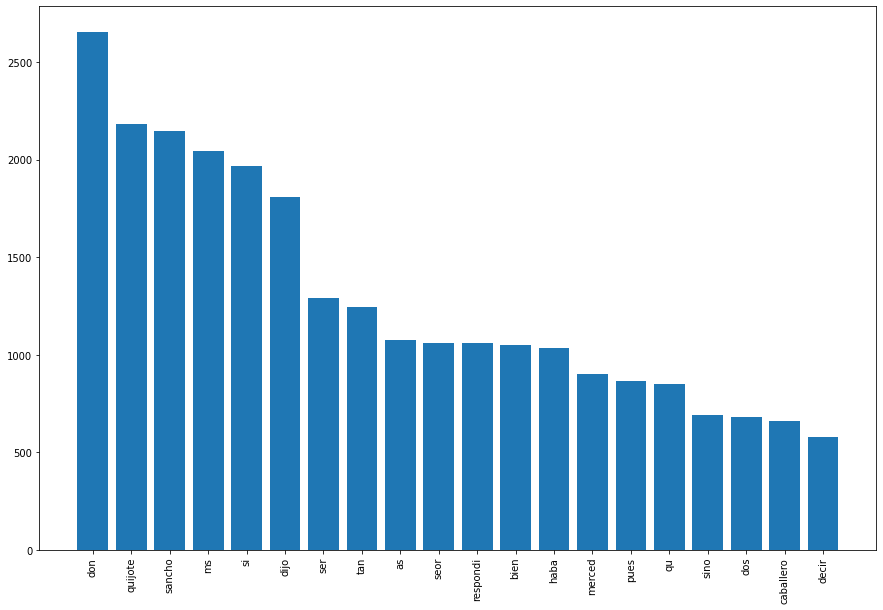

In [ ]:
# opción 1:
# TOKENIZAR con .split(), 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  22837
[('don', 2652), ('quijote', 2180), ('sancho', 2148), ('ms', 2044), ('si', 1966), ('dijo', 1808), ('ser', 1293), ('l', 1283), ('tan', 1243), ('as', 1075), ('seor', 1063), ('respondi', 1063), ('bien', 1050), ('haba', 1034), ('merced', 900), ('pues', 865), ('qu', 849), ('s', 741), ('sino', 694), ('dos', 684)]


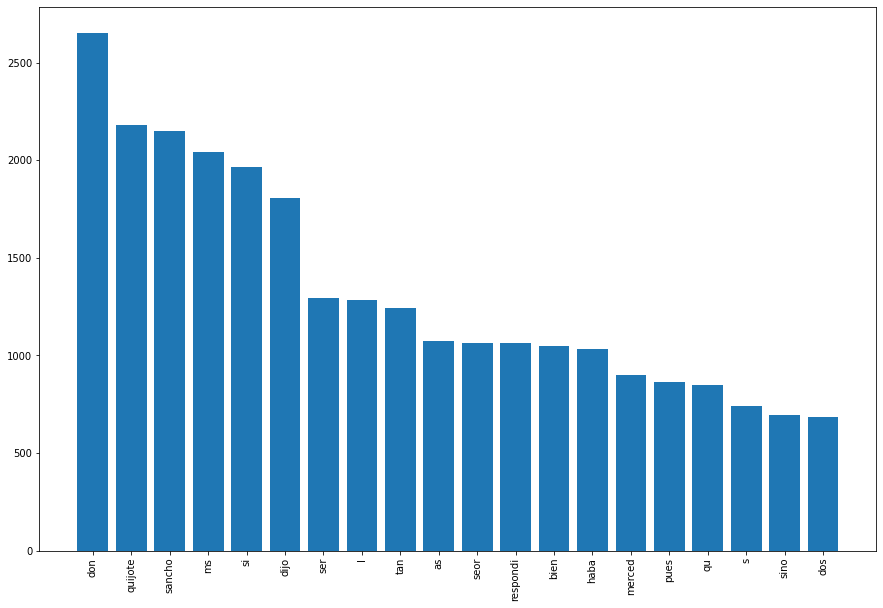

In [ ]:
# opción 2:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

tokens = nltk.word_tokenize(filedata)
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  17400


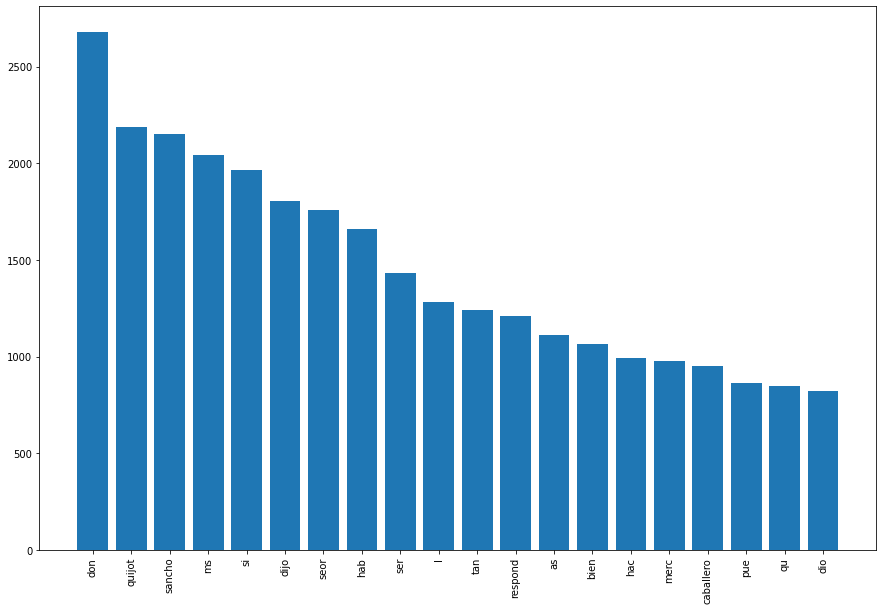

In [ ]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
# probar cada una de las siguientes opciones: porter y lancaster.
#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  17331


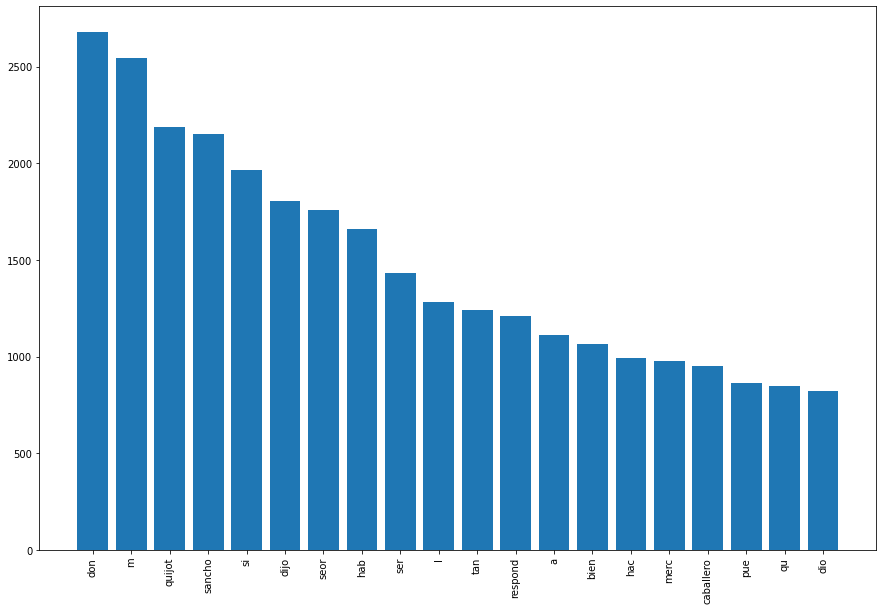

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones: 
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
word_freq = fdist.most_common(len(fdist))

In [ ]:
# extract top 30 words
top_words = word_freq[:20]
print(top_words)

[('don', 2678), ('m', 2546), ('quijot', 2186), ('sancho', 2150), ('si', 1966), ('dijo', 1808), ('seor', 1758), ('hab', 1662), ('ser', 1433), ('l', 1283), ('tan', 1243), ('respond', 1211), ('a', 1114), ('bien', 1068), ('hac', 994), ('merc', 976), ('caballero', 954), ('pue', 865), ('qu', 849), ('dio', 825)]


In [ ]:
import pandas as pd
df = pd.DataFrame(top_words)
df.head()

,0,1
0,don,2678
1,m,2546
2,quijot,2186
3,sancho,2150
4,si,1966


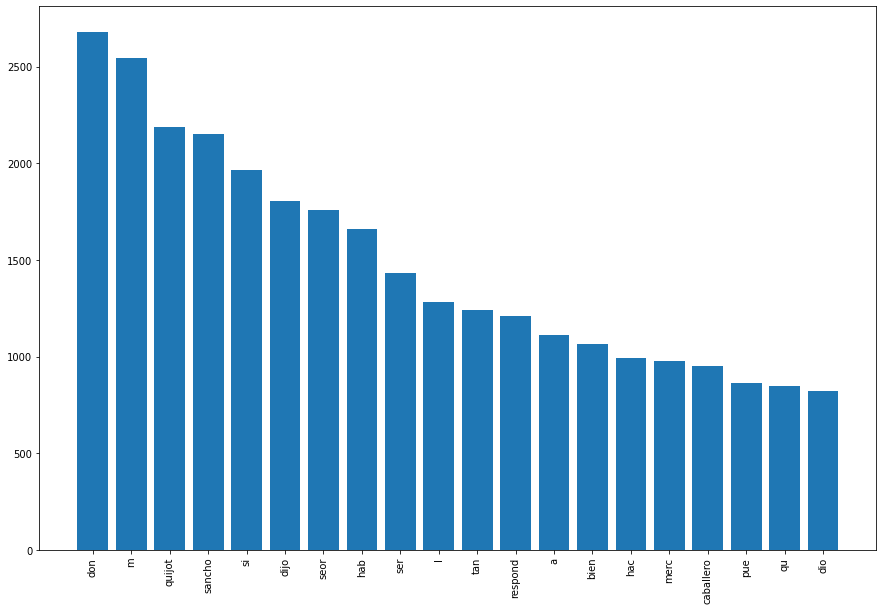

In [ ]:
import matplotlib.pyplot as plt
x,y = zip(*top_words)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

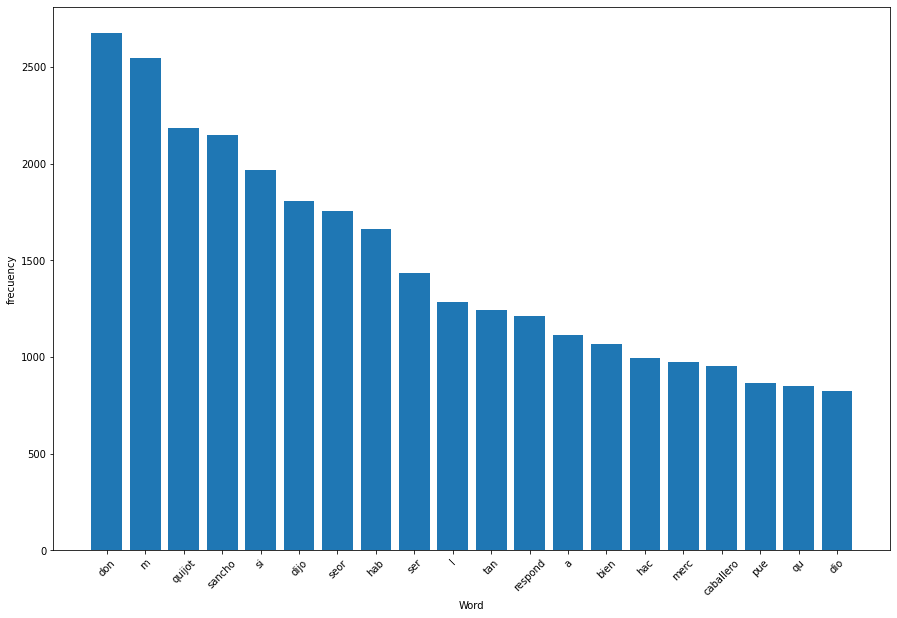

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_words)
plt.figure(figsize=(15,10))
plt.bar(df[0],df[1])
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("frecuency")
plt.show()